# **Assignment 1** 
# Srujana Vanka  - 2020102005

# Question 8

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# Importing librabies
import numpy as np
import pandas as pd 
import cv2
import matplotlib.pyplot as plt
import os
%matplotlib inline
from google.colab.patches import cv2_imshow 
import math
import time 

In [ ]:
%cd /content/drive/MyDrive/images
%ls


We know that Quantization, involved in image processing, is a lossy compression technique achieved by compressing a range of values to a single quantum value.

So first let us remove the unnecessary pixels from our input image. 

In [11]:
def bitQuantizer(img,k):
    return np.around(img*((2**k-1)/255)).astype(int)

Text(0.5, 1.0, 'After bit quantization')

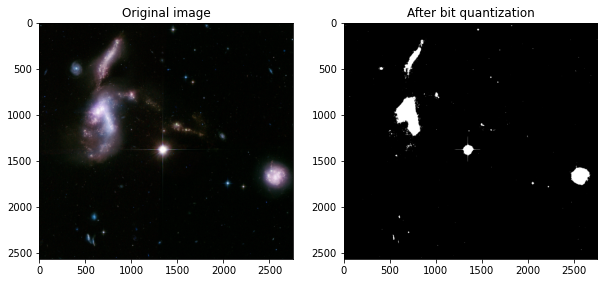

In [17]:
img = cv2.imread('galaxies.jpeg')

plt.figure(figsize = (10,9))
plt.subplot(121)
plt.imshow(img, cmap='gray')
plt.title('Original image')
img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

plt.subplot(122)
quant = bitQuantizer(img,1) # 1 as we want to compress it maximum 
plt.imshow(quant, cmap='gray')
plt.title('After bit quantization')

We can see that there is some white noise which looks like salt and pepper noise, hence we will apply median filter. 

In [18]:
def effMedianFilter(img,k):

    h,w = img.shape
    
    output = np.zeros([h,w])
    
    padding_img = np.zeros([h+k-1,w+k-1],dtype='int64')
    padding_img[int((k-1)/2):int(h+(k-1)/2),int((k-1)/2):int(w+(k-1)/2)] = img
    
    prev_mem_j = np.zeros(256) # prev avg along horizontal direction (coloumns)
    prev_mem_i = np.zeros(256) # prev avg along horizontal direction (rows)
    

    for i in range(int((k-1)/2),h+int((k-1)/2)):
        if i==int((k-1)/2):
            mem = np.zeros(256)
            for ii in range(k):
                for jj in range(k):
                       mem[padding_img[ii,jj]] +=1
        else:
            mem = np.copy(prev_mem_i)
            for px in padding_img[i-int((k-1)/2)-1:i-int((k-1)/2),0:k]:
                mem[px] -= 1
            for px in padding_img[i+int((k-1)/2):i+int((k-1)/2)+1,0:k]:
                mem[px] += 1
        
        prev_mem_i = np.copy(mem)
        
        for j in range(int((k-1)/2),w+int((k-1)/2)):
            if j == int((k-1)/2):
                mem = np.copy(prev_mem_i)
            else:
                mem = np.copy(prev_mem_j)
                for px in padding_img[i-int((k-1)/2):i+int((k-1)/2)+1,j-int((k-1)/2)-1:j-int((k-1)/2)]:
                    mem[px] -= 1
                for px in padding_img[i-int((k-1)/2):i+int((k-1)/2)+1,j+int((k-1)/2):j+int((k-1)/2)+1]:
                    mem[px] += 1
              
            prev_mem_j = np.copy(mem)
                
            curr_sum = 0
            for ii in range(256):
                curr_sum += mem[ii]
                if curr_sum > int((k*k)/2):
                    output[i-int((k-1)/2),j-int((k-1)/2)] = ii
                    break


    return np.int64(output)

Text(0.5, 1.0, 'After smoothing using median filter')

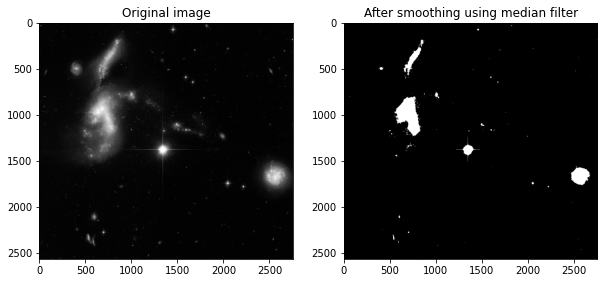

In [21]:
plt.figure(figsize = (10,9))
plt.subplot(121)
plt.imshow(img, cmap='gray')
plt.title('Original image')

plt.subplot(122)
output = effMedianFilter(quant,3) 
plt.imshow(output, cmap='gray')
plt.title('After smoothing using median filter')